# Toyota Corolla Used Car Price Prediction Using Support Vector Regression

### Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading data from Excel Sheets

In [2]:
ToyotaCorolla = pd.read_excel("ToyotaCorolla.xlsx", sheet_name = [0, 1])

desc = ToyotaCorolla[0]
data = ToyotaCorolla[1]

### Checking The Invalid Data

In [3]:
print("Count of Invalid data : \n", data.isna().sum())
print("Count of Invalid data : \n", desc.isna().sum())
print("Dropping NAN data from Description")
desc = desc.dropna()

Count of Invalid data : 
 Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64
Count of Invalid data : 
 Variable       2
Description    3
dtyp

### Dropping Duplicate Columns and getting Metrics (We are already has the columns with age so no need for Mfg_Month, Mfg_Year)

In [4]:
data = data.drop(columns = ['Id', 'Mfg_Month', 'Mfg_Year'])
metrics = data.describe().T

print(metrics)

                    count          mean           std     min      25%  \
Price              1436.0  10730.824513   3626.964585  4350.0   8450.0   
Age_08_04          1436.0     55.947075     18.599988     1.0     44.0   
KM                 1436.0  68533.259749  37506.448872     1.0  43000.0   
HP                 1436.0    101.502089     14.981080    69.0     90.0   
Met_Color          1436.0      0.674791      0.468616     0.0      0.0   
Automatic          1436.0      0.055710      0.229441     0.0      0.0   
CC                 1436.0   1576.855850    424.386770  1300.0   1400.0   
Doors              1436.0      4.033426      0.952677     2.0      3.0   
Cylinders          1436.0      4.000000      0.000000     4.0      4.0   
Gears              1436.0      5.026462      0.188510     3.0      5.0   
Quarterly_Tax      1436.0     87.122563     41.128611    19.0     69.0   
Weight             1436.0   1072.459610     52.641120  1000.0   1040.0   
Mfr_Guarantee      1436.0      0.40947

### Differentiating between Sparse columns and Categorical Columns

In [5]:
data_types = data.dtypes
categ_columns = data_types[data_types=='object']
print(categ_columns.index)
new_categ_data = pd.get_dummies(data, columns = categ_columns.index)
sparse_columns = new_categ_data.columns[new_categ_data.nunique()>2]
print(sparse_columns)
new_categ_data[sparse_columns].head()

Index(['Model', 'Fuel_Type', 'Color'], dtype='object')
Index(['Price', 'Age_08_04', 'KM', 'HP', 'CC', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight', 'Guarantee_Period'],
      dtype='object')


,Price,Age_08_04,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight,Guarantee_Period
0,13500,23,46986,90,2000,3,5,210,1165,3
1,13750,23,72937,90,2000,3,5,210,1165,3
2,13950,24,41711,90,2000,3,5,210,1165,3
3,14950,26,48000,90,2000,3,5,210,1165,3
4,13750,30,38500,90,2000,3,5,210,1170,3


### Scaling the sparse data to a particular range using sklearn

In [6]:
from sklearn import preprocessing

scale = preprocessing.MinMaxScaler(feature_range = (0,10)).fit(new_categ_data[sparse_columns])
new_categ_data[sparse_columns] = scale.transform(new_categ_data[sparse_columns])
new_categ_data.head()

C:\Users\91998\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Price,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,...,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,3.250444,2.784810,1.933547,1.707317,1,0,0.47619,3.333333,4,6.666667,...,0,0,1,0,0,0,0,0,0,0
1,3.339254,2.784810,3.001494,1.707317,1,0,0.47619,3.333333,4,6.666667,...,0,0,0,0,0,0,1,0,0,0
2,3.410302,2.911392,1.716468,1.707317,1,0,0.47619,3.333333,4,6.666667,...,0,0,1,0,0,0,0,0,0,0
3,3.765542,3.164557,1.975276,1.707317,0,0,0.47619,3.333333,4,6.666667,...,0,1,0,0,0,0,0,0,0,0
4,3.339254,3.670886,1.584328,1.707317,0,0,0.47619,3.333333,4,6.666667,...,0,1,0,0,0,0,0,0,0,0


### Splitting the data into Test, Train and Validation sets

In [7]:
data_x = np.array(new_categ_data.drop(columns = ['Price']))
data_y = np.array(new_categ_data["Price"])
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.5, shuffle = True)
test_x, val_x, test_y, val_y = train_test_split(data_x, data_y, test_size=0.6, shuffle = True)
weights = np.random.randn(train_x.shape[1],1)
m = train_x.shape[0]
bias = np.random.randn()
print("No of Training Samples : ",m)
print("No of Testing Samples : ",test_x.shape[0])
print("No of Validation Samples : ",val_x.shape[0])

No of Training Samples :  718
No of Testing Samples :  574
No of Validation Samples :  862


### Using Custom Training for Prection

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#Custom Training 
y_pred = 0
loss = 0
grad = 0
test_pred = 0
test_loss = 0
lr = 0.001
for i in range(100000):
    y_pred = (np.dot(train_x, weights) + bias).flatten()
    #print(y_pred.shape, train_y.shape)
    loss = np.sum(np.square(y_pred - train_y))/m
    grad = 2 * np.dot(train_x.T, (y_pred-train_y).reshape(train_y.shape[0],1))/m
    weights = weights - lr * grad
    bias = bias - lr * np.sum(y_pred - train_y)
    if (i%1000==0):
        print("Train Loss at epoch ", i, " : ",loss,weights.shape)
        val_pred = (np.dot(val_x, weights) + bias).flatten()
        val_loss = np.sum(np.square(val_pred - val_y))/val_y.shape[0]
        print("Test Loss : at epoch ", i, " : ",val_loss)

#Predicting Score
from sklearn.metrics import r2_score
test_pred = (np.dot(test_x, weights) + bias).flatten()
train_pred = (np.dot(train_x, weights) + bias).flatten()
val_pred = (np.dot(val_x, weights) + bias).flatten()
train_score = r2_score(test_y, test_pred)
test_score = r2_score(test_y, test_pred)
val_score = r2_score(test_y, test_pred)
print("Scores on Train, Test and Validation data : ",train_score, test_score, val_score, sep=';')

Train Loss at epoch  0  :  18.380459833910255 (417, 1)
Test Loss : at epoch  0  :  15.922641125977263
Train Loss at epoch  1000  :  2.4079026912486166 (417, 1)
Test Loss : at epoch  1000  :  2.45487463367133
Train Loss at epoch  2000  :  1.8085637556048653 (417, 1)
Test Loss : at epoch  2000  :  1.8851564727111285
Train Loss at epoch  3000  :  1.5238546531334738 (417, 1)
Test Loss : at epoch  3000  :  1.6019486559326992
Train Loss at epoch  4000  :  1.3467564337004208 (417, 1)
Test Loss : at epoch  4000  :  1.4213322973173907
Train Loss at epoch  5000  :  1.2244660579222895 (417, 1)
Test Loss : at epoch  5000  :  1.2962511240679937
Train Loss at epoch  6000  :  1.133487717502314 (417, 1)
Test Loss : at epoch  6000  :  1.2036805187272108
Train Loss at epoch  7000  :  1.0619423011679217 (417, 1)
Test Loss : at epoch  7000  :  1.131440857239016
Train Loss at epoch  8000  :  1.0033696089620097 (417, 1)
Test Loss : at epoch  8000  :  1.072782064110219
Train Loss at epoch  9000  :  0.9540203

Test Loss : at epoch  76000  :  0.4711795911192839
Train Loss at epoch  77000  :  0.33471544736639924 (417, 1)
Test Loss : at epoch  77000  :  0.4688603748716982
Train Loss at epoch  78000  :  0.3319098579240781 (417, 1)
Test Loss : at epoch  78000  :  0.4665805237713453
Train Loss at epoch  79000  :  0.32914948132748667 (417, 1)
Test Loss : at epoch  79000  :  0.4643390991598413
Train Loss at epoch  80000  :  0.3264332326181024 (417, 1)
Test Loss : at epoch  80000  :  0.46213519328589064
Train Loss at epoch  81000  :  0.3237600638726331 (417, 1)
Test Loss : at epoch  81000  :  0.45996792773466816
Train Loss at epoch  82000  :  0.32112896237903354 (417, 1)
Test Loss : at epoch  82000  :  0.45783645198208717
Train Loss at epoch  83000  :  0.31853894894026163 (417, 1)
Test Loss : at epoch  83000  :  0.4557399420611112
Train Loss at epoch  84000  :  0.31598907629425377 (417, 1)
Test Loss : at epoch  84000  :  0.45367759932872775
Train Loss at epoch  85000  :  0.3134784276398004 (417, 1)
T

### Using Support Vector Machine for Prediction

In [9]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn import metrics
svr = SVR()
model = svr.fit(train_x, train_y)
print("Model Score using SVR Training : ", svr.score(test_x, test_y))
print("Model Score using Custom Training : ", test_score)
pred = svr.predict(test_x)

C:\Users\91998\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model Score using SVR Training :  0.8857827231578715
Model Score using Custom Training :  0.7357223151376389


### Plotting The Predicted Values

Actual Value :  1.3854351687388988  Custom Predicted Value :  1.7965956526080822  SVR Predicted Value :  1.7763292487462583
Actual Value :  1.6341030195381883  Custom Predicted Value :  1.6709528142521322  SVR Predicted Value :  1.7014145086542674
Actual Value :  2.3445825932504443  Custom Predicted Value :  2.6501037791740445  SVR Predicted Value :  2.789859708335007
Actual Value :  1.3854351687388988  Custom Predicted Value :  2.91772550222202  SVR Predicted Value :  1.5565596843833491
Actual Value :  2.3445825932504443  Custom Predicted Value :  2.155639732834012  SVR Predicted Value :  2.1807684853865656
Actual Value :  1.2788632326820604  Custom Predicted Value :  1.6428681769957727  SVR Predicted Value :  1.550384254741774
Actual Value :  6.625222024866785  Custom Predicted Value :  3.7873467376833054  SVR Predicted Value :  5.362016885765017
Actual Value :  1.3854351687388988  Custom Predicted Value :  3.193913120922674  SVR Predicted Value :  1.669238258903293
Actual Value :  1

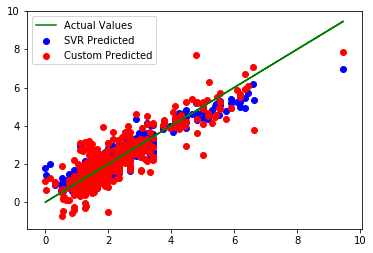

In [10]:
for x, y, z in zip(test_y[:10], test_pred[:10], pred[:10]):
    print("Actual Value : ", x, " Custom Predicted Value : ", y, " SVR Predicted Value : ", z)
from matplotlib import pyplot as plt
plt.plot(test_y, test_y, c = "g")
plt.scatter(test_y, pred, c = 'b')
plt.scatter(test_y, test_pred, c = "r")
plt.legend([ 'Actual Values', 'SVR Predicted', 'Custom Predicted'])